Stock Price Prediction PROJECT

In [6]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
# %matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


#read the file
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
headers= ["Date","Open","Close"]
print(df)
# df.columns=headers
scaler.fit(df.iloc[:,1:])
print(scaler.transform(df.iloc[:,1:]))

#print the head
# df.head(10)


            Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0     2018-10-08  208.00  222.25  ...  215.15             4642146.0         10062.83
1     2018-10-05  217.00  218.60  ...  209.20             3519515.0          7407.06
2     2018-10-04  223.50  227.80  ...  218.20             1728786.0          3815.79
3     2018-10-03  230.00  237.50  ...  227.60             1708590.0          3960.27
4     2018-10-01  234.55  234.60  ...  230.90             1534749.0          3486.05
...          ...     ...     ...  ...     ...                   ...              ...
1230  2013-10-14  160.85  161.45  ...  159.45             1281419.0          2039.09
1231  2013-10-11  161.15  163.45  ...  160.05             1880046.0          3030.76
1232  2013-10-10  156.00  160.80  ...  160.15             3124853.0          4978.80
1233  2013-10-09  155.70  158.20  ...  155.55             2049580.0          3204.49
1234  2013-10-08  157.00  157.80  ...  155.80             1720413

Text(0.5, 0, 'Date')

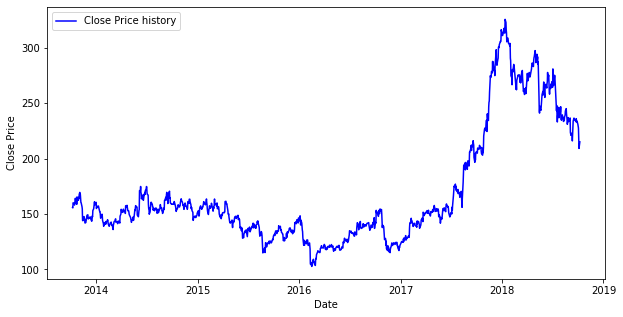

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
# plt.figure(figsize=(16,8))
plt.plot(df['Close'],color='blue', label='Close Price history')
plt.legend()
plt.ylabel("Close Price")
plt.xlabel("Date")
# plt.title('Rolling Mean & Standard Deviation')
# plt.show(block=False)


In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# x_test, y_test = [], []

# for i in range((len(train)+60),len(dataset)):
#     x_test.append(scaled_data[i-60:i,0])
#     y_test.append(scaled_data[i,0])
# x_test, y_test = np.array(x_test), np.array(y_test)

# x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.15))
model.add(LSTM(units=50))
model.add(Dropout(0.15))
model.add(Dense(1))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=40, batch_size=5)

Epoch 1/40
186/186 [==============================] - 1s 8ms/step - loss: 2.9061e-04
Epoch 2/40
186/186 [==============================] - 1s 7ms/step - loss: 2.9697e-04
Epoch 3/40
186/186 [==============================] - 1s 7ms/step - loss: 2.5668e-04
Epoch 4/40
186/186 [==============================] - 1s 7ms/step - loss: 2.7459e-04
Epoch 5/40
186/186 [==============================] - 1s 7ms/step - loss: 2.8171e-04
Epoch 6/40
186/186 [==============================] - 1s 7ms/step - loss: 2.6559e-04
Epoch 7/40
186/186 [==============================] - 1s 7ms/step - loss: 2.9424e-04
Epoch 8/40
186/186 [==============================] - 1s 7ms/step - loss: 2.6582e-04
Epoch 9/40
186/186 [==============================] - 1s 7ms/step - loss: 2.6808e-04
Epoch 10/40
186/186 [==============================] - 1s 7ms/step - loss: 2.6935e-04
Epoch 11/40
186/186 [==============================] - 1s 7ms/step - loss: 2.6447e-04
Epoch 12/40
186/186 [==============================] - 1s 7ms/s

In [ ]:
# predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
valid

In [ ]:
# closing_price

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 0, 'Date')

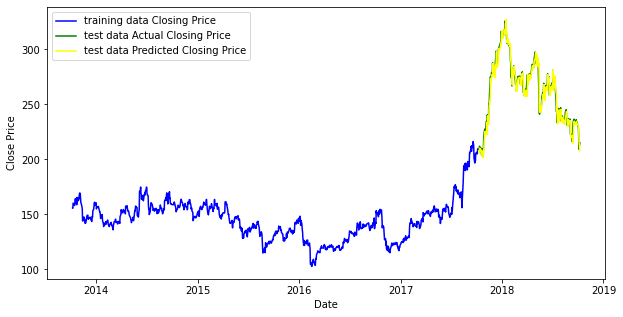

In [ ]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'],Color='blue',label='training data Closing Price')
plt.plot(valid['Close'],Color='green',label='test data Actual Closing Price')
plt.plot(valid['Predictions'],Color='yellow',label='test data Predicted Closing Price')
plt.legend()
plt.ylabel("Close Price")
plt.xlabel("Date")

In [ ]:
y_test=np.array(valid['Close'])
from sklearn.metrics import r2_score
rnn_score = r2_score(y_test,closing_price)

In [ ]:
rnn_score

0.9553864238779226

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

Close          6.020101
Predictions    0.000000
dtype: float64